# Haushaltsanalyse der Einkäufe (Gesamtbeträge) 

## Module-Importe

**Mudele zur Berechnung und darstellung**

Zur Darstellung wird der Stil 'ggplot' verwendet.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dts
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

## Einlesen der Daten

### Datentypen

In [4]:
dtypes = dict(Nutzer=str, Einkäufer=str, Datum=str, Geschäft=str, Betreff=str, Betrag=np.float64)

### Einlesen und Aufbereiten

Es werden die ersten fünf Zeilen der Tabelle gezeigt.

**Einlesen**

Es wird eine CSV-Datei eingelesen. Die Daten sind mit ';' getrennt.

**Aufbereiten**

Die Datumsspalte wird genutzt um Labels für die Plots zu generieren.

In [6]:
el = pd.read_csv('Einkaufs_Liste.csv', sep=';', dtype=dtypes, parse_dates=['Datum'])
el['Monat'] = el['Datum'].apply(lambda d: d.month)
el['Jahr'] = el['Datum'].apply(lambda d: d.year)
el.head(5)

,Nutzer,Einkäufer,Datum,Geschäft,Betreff,Betrag,Monat,Jahr
0,Tobias,Tobias,2019-03-11,Penny,Wocheneinkauf,29.66,3,2019
1,Tobias,Anne,2019-03-05,Rewe,Wocheneinkauf,30.49,3,2019
2,Tobias,Anne,2019-01-09,Edeka,Gewürze,33.39,1,2019
3,Tobias,Anne,2019-03-01,Hans Wagner Fleischerei,Wurst,15.63,3,2019
4,Tobias,Anne,2019-01-30,Rewe,Wocheneinkauf,29.83,1,2019


### Tabellen Infos

In [4]:
el.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 8 columns):
Nutzer       29 non-null object
Einkäufer    29 non-null object
Datum        29 non-null datetime64[ns]
Geschäft     29 non-null object
Betreff      29 non-null object
Betrag       29 non-null float64
Monat        29 non-null int64
Jahr         29 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 1.9+ KB


## Gesamteinkäufe und Wocheneinkäufe

### Berechnung

Es wird er Gesamtsumme aller Einkäufe für den einzelnen Einkäufer gebildet und
diese dann prozentual ins Verhältnis gesetzt.
Wir erhalten also eine Aussage über die Kostenbalance der Parteien.

Das gleiche wird für alle Einkäufe mit dem Betreff Wocheneinkauf wiederholt.
Damit wissen wir jetzt, wer häuiger Nahrungsmittel einkauft und gleichzeitig die
Last im Altag trägt (große Anschaffungen ausgeklammert).

In [7]:
byG = el.groupby('Einkäufer').sum()['Betrag']
byG.name = 'Gesamteinkäufe'
byW = el[el['Betreff'] == 'Wocheneinkauf'].groupby('Einkäufer').sum()['Betrag']
byW.name = 'Wocheneinkäufe'

### Darstellung

Eine optimale Darstellung bietet uns hier das Kuchendiagramm.
In den Diagrammtiteln ist der jeweilige absolute Wert mit aufgenommen.

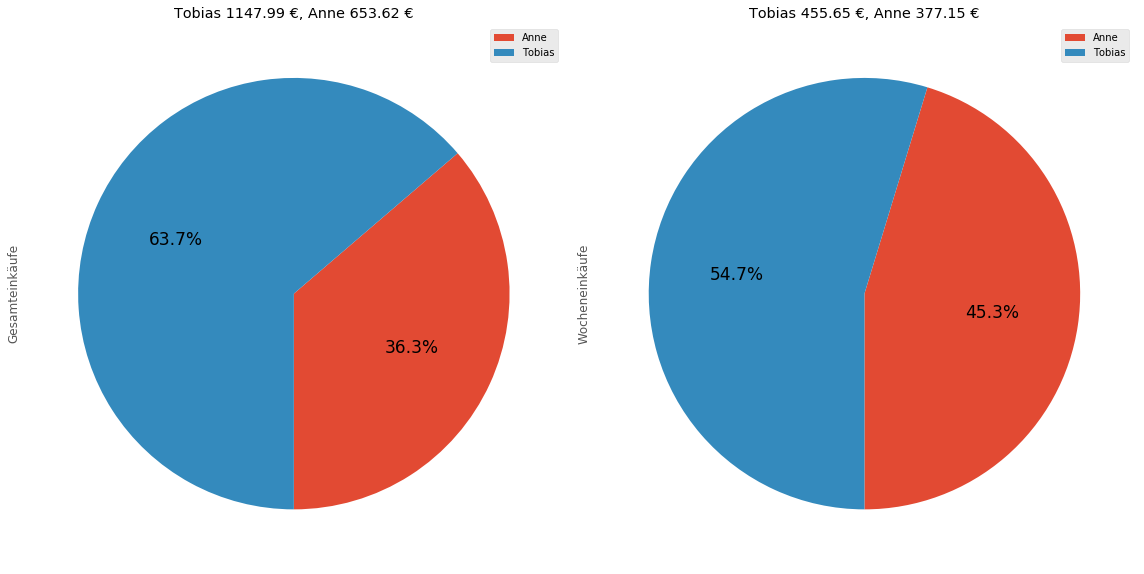

In [41]:
fig = plt.figure(figsize=(16,16))
ax1= plt.subplot2grid((1,2),(0,0), fig=fig)
ax2= plt.subplot2grid((1,2),(0,1), fig=fig)

byG.plot(
    ax=ax1,
    kind='pie',
    y='Betrag',
    legend=True,
    autopct='%1.1f%%',
    startangle=270,
    fontsize=17,
    labels=None,
    title="Tobias {:0.2f} €, Anne {:0.2f} €".format(byG['Tobias'], byG['Anne']),
)

byW.plot(
    ax=ax2,
    kind='pie',
    y='Betrag',
    legend=True,
    autopct='%1.1f%%',
    startangle=270,
    fontsize=17,
    labels=None,
    title="Tobias {:0.2f} €, Anne {:0.2f} €".format(byW['Tobias'], byW['Anne']),
)
plt.tight_layout()

## Monatsübersicht

**Hier lassen wir uns für jeden Monat die den Gesamtbetrag der Einkäufe anzeigen.**

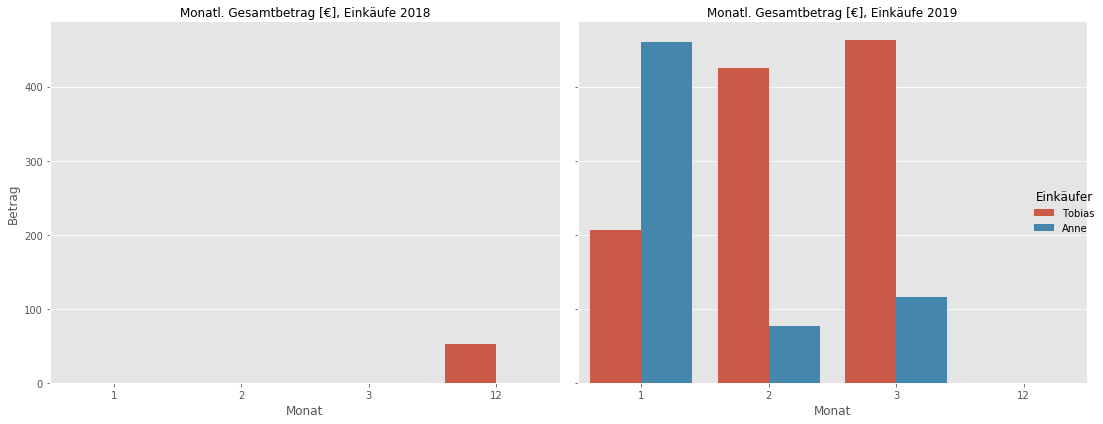

In [55]:
fig = sns.catplot(kind='bar', data=el, col='Jahr', hue='Einkäufer', x='Monat', y='Betrag', estimator=np.sum, ci=None, height=6, aspect=1.2, legend_out=True)
fig.set_titles("Monatl. Gesamtbetrag [€], Einkäufe {col_name}")
plt.tight_layout()

## Übersicht über die besuchten Geschäfte

Wir lassen uns hier die Anzahl der getätigten Einkäufe in den besuchten Geschäften anzeigen.
Die Grafiken vermitteln dabei einen guten Eindruck wer eher größere bzw. gezieltere Anschaffungen tätigt,
also z.B. Möbel oder Technik kauft.
Desweiteren wird durch entsprechend weite Verteilung auf bestimmte Geschäfte sehr schön aufgezeigt,
wer vermehrt für den Kauf von Altagsartikeln in der Gemeinschaft zuständig ist. 

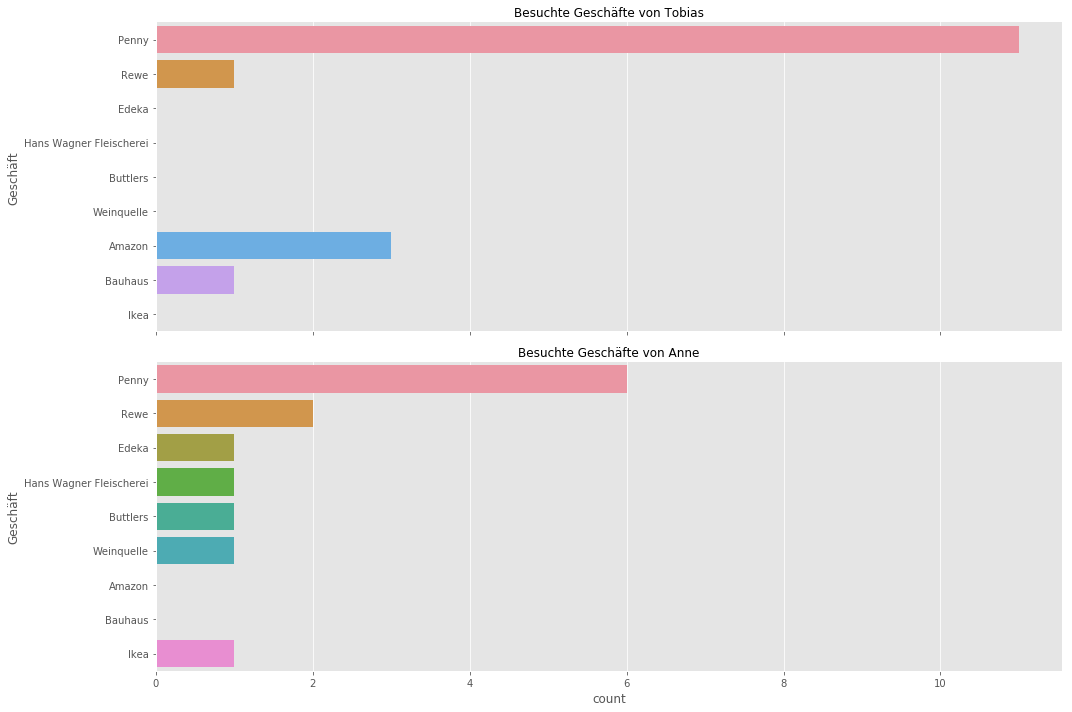

In [28]:
fig = sns.catplot(y='Geschäft', kind='count', data=el, row='Einkäufer', orient="h", aspect=3)
fig.set_titles("Besuchte Geschäfte von {row_name}")
plt.tight_layout()